In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Serialize and deserialize the curriculum

load the example curriculum

In [4]:
from dynamic_foraging_curriculum.curriculums.coupled_baiting import coupled_baiting_curriculum

Serialize the curriculum to json

In [5]:
path = "/root/capsule/code/dynamic_foraging_curriculum/curriculums/"
coupled_baiting_curriculum.save_to_json(path)

Load the saved curriculum from json

In [6]:
import json
with open(path + "curriculum_Coupled Baiting_0.1_1.0.json", "r") as f:
    loaded_json = json.load(f)

loaded_json

{'task': 'Coupled Baiting',
 'curriculum_version': '0.1',
 'task_schema_version': '1.0',
 'parameters': {'Stage 1': {'task_schema_version': '1.0',
   'curriculum_version': '0.1',
   'task': 'Coupled Baiting',
   'training_stage': 'Stage 1',
   'description': "Phase B in Han's slides (block = [10, 20, 5], p_sum = 0.8, p_ratio = [1:0])",
   'BaseRewardSum': 0.8,
   'RewardFamily': 3,
   'RewardParisN': 1,
   'UncoupledReward': '',
   'BlockMin': 10,
   'BlockMax': 20,
   'BlockBeta': 5,
   'BlockMinReward': 0,
   'DelayMin': 0.5,
   'DelayMax': 0.5,
   'DelayBeta': 0.0,
   'AutoReward': True,
   'AutoWaterType': 'Natural',
   'Multiplier': 0.5,
   'Unrewarded': 5,
   'Ignored': 5,
   'ITIMin': 1.0,
   'ITIMax': 7.0,
   'ITIBeta': 3.0,
   'ITIIncrease': 0.0,
   'ResponseTime': 5.0,
   'RewardConsumeTime': 3.0,
   'StopIgnores': 20000,
   'AdvancedBlockAuto': 'now',
   'SwitchThr': 0.5,
   'PointsInARow': 5,
   'MaxTrial': 1000,
   'MaxTime': 90,
   'RightValue': 0.05,
   'LeftValue': 0.05

Recover the `DynamicForagingCurriculum` class

In [7]:
from dynamic_foraging_curriculum.schema.curriculum import DynamicForagingCurriculum, TrainingStage
loaded_curriculum = DynamicForagingCurriculum(**loaded_json)

# Retrieve the transition rules from the STAGE_FINAL
loaded_curriculum.curriculum[TrainingStage.STAGE_FINAL].transition_rules

[TransitionRule(decision=<Decision.PROGRESS: 'progress'>, to_stage=<TrainingStage.GRADUATED: 'Graduated'>, condition='lambda metrics:\n                        metrics.session_total >= 10 \n                        and\n                        metrics.session_at_current_stage >= 5\n                        and\n                        np.mean(metrics.finished_trials[-5:]) >= 500\n                        and\n                        np.mean(metrics.foraging_efficiency[-5:]) >= 0.7\n                        ', condition_description='For recent 5 sessions,mean finished trials >= 500 and mean efficiency >= 0.7 and total sessions >= 10 and sessions at final >= 5'),
 TransitionRule(decision=<Decision.ROLLBACK: 'rollback'>, to_stage=<TrainingStage.STAGE_3: 'Stage 3'>, condition='lambda metrics:\n                        np.mean(metrics.finished_trials[-2:]) < 400\n                        or\n                        np.mean(metrics.foraging_efficiency[-2:]) < 0.6\n                        ', conditi

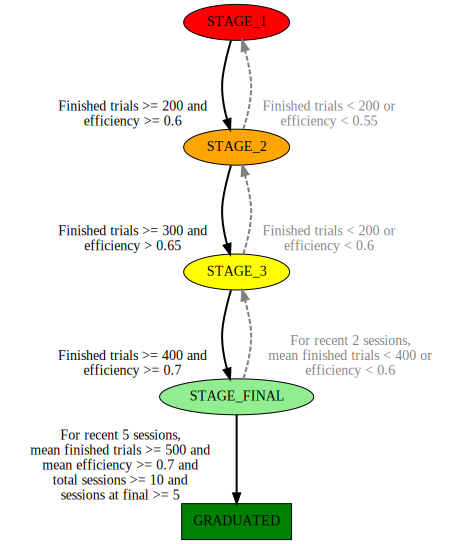

In [18]:
dot = loaded_curriculum.draw_curriculum_diagram()
# dot.render('curriculum_diagram', format='svg')
dot

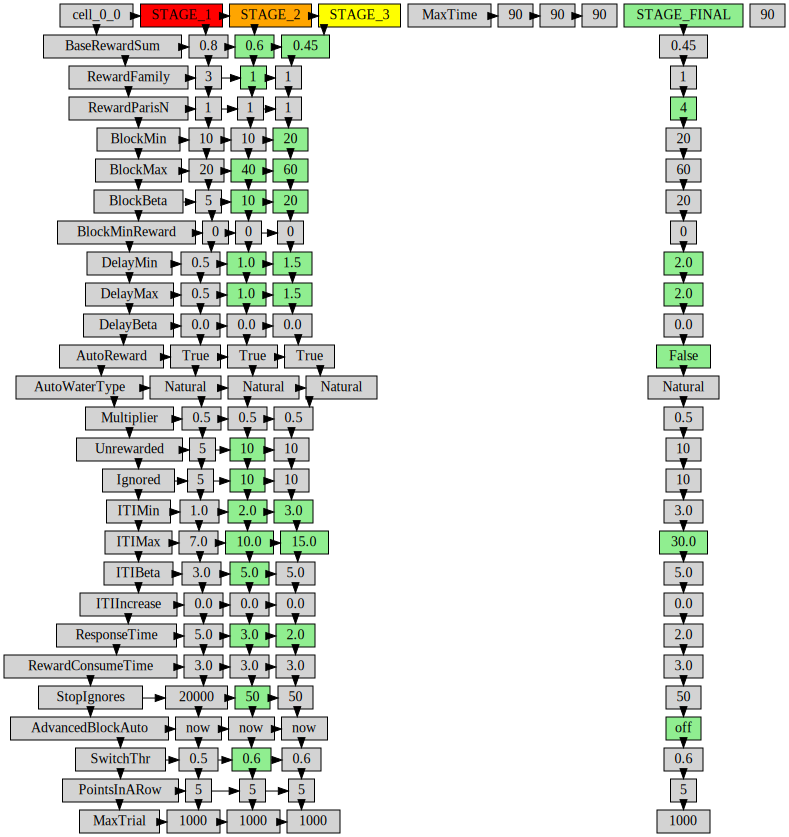

In [91]:
loaded_curriculum.draw_parameter_table()

In [19]:
stage = list(loaded_curriculum.parameters.keys())[0]
paras = loaded_curriculum.parameters[stage]

In [35]:
paras.schema()['properties']['BlockMin']['title']

'Block length (min)'

In [20]:
paras.to_GUI_format()

{'task_schema_version': '1.0',
 'curriculum_version': '0.1',
 'task': 'Coupled Baiting',
 'training_stage': 'Stage 1',
 'description': "Phase B in Han's slides (block = [10, 20, 5], p_sum = 0.8, p_ratio = [1:0])",
 'BaseRewardSum': '0.8',
 'RewardFamily': '3',
 'RewardParisN': '1',
 'UncoupledReward': '',
 'BlockMin': '10',
 'BlockMax': '20',
 'BlockBeta': '5',
 'BlockMinReward': '0',
 'DelayMin': '0.5',
 'DelayMax': '0.5',
 'DelayBeta': '0.0',
 'AutoReward': True,
 'AutoWaterType': 'Natural',
 'Multiplier': '0.5',
 'Unrewarded': '5',
 'Ignored': '5',
 'ITIMin': '1.0',
 'ITIMax': '7.0',
 'ITIBeta': '3.0',
 'ITIIncrease': '0.0',
 'ResponseTime': '5.0',
 'RewardConsumeTime': '3.0',
 'StopIgnores': '20000',
 'AdvancedBlockAuto': 'now',
 'SwitchThr': '0.5',
 'PointsInARow': '5',
 'MaxTrial': '1000',
 'MaxTime': '90'}